In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [4]:
data = pd.read_csv('cannabis copy.csv', sep=",")

In [5]:
data.shape

(2351, 6)

In [6]:
data.dtypes

Strain          object
Type            object
Rating         float64
Effects         object
Flavor          object
Description     object
dtype: object

In [7]:
data.isnull().sum()

Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64

In [8]:
data.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [9]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2351


In [10]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((2351, 6), (2351, 4))

In [11]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((2351, 6), (2277, 6))

In [12]:
data_new_3 = data.fillna(0)
data_new_3.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [13]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Flavor. Тип данных object. Количество пустых значений 46, 1.96%.
Колонка Description. Тип данных object. Количество пустых значений 33, 1.4%.


In [15]:
cat_temp_data = data[['Flavor']]
cat_temp_data.head()

,Flavor
0,"Earthy,Sweet,Citrus"
1,"Flowery,Violet,Diesel"
2,"Spicy/Herbal,Sage,Woody"
3,"Apricot,Citrus,Grapefruit"
4,"Citrus,Earthy,Orange"


In [16]:
cat_temp_data['Flavor'].unique()

array(['Earthy,Sweet,Citrus', 'Flowery,Violet,Diesel',
       'Spicy/Herbal,Sage,Woody', ..., 'Diesel,Citrus,Pine',
       'Spicy/Herbal,Earthy,Sweet', 'Diesel,Pungent,Sage'], dtype=object)

In [17]:
cat_temp_data[cat_temp_data['Flavor'].isnull()].shape

(46, 1)

In [19]:
# Импьютация наиболее частыми значениями
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Earthy,Sweet,Citrus'],
       ['Flowery,Violet,Diesel'],
       ['Spicy/Herbal,Sage,Woody'],
       ...,
       ['Earthy,Sweet,Spicy/Herbal'],
       ['Sweet,Earthy,Pungent'],
       ['Berry,Earthy,Pungent']], dtype=object)

In [24]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Ammonia,Blueberry,Grape', 'Ammonia,Citrus,Coffee',
       'Ammonia,Citrus,Rose', ..., 'Woody,Spicy/Herbal,Sweet',
       'Woody,Sweet,Diesel', 'Woody,Sweet,Earthy'], dtype=object)

In [26]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Earthy,Sweet,Citrus'],
       ['Flowery,Violet,Diesel'],
       ['Spicy/Herbal,Sage,Woody'],
       ...,
       ['Earthy,Sweet,Spicy/Herbal'],
       ['Sweet,Earthy,Pungent'],
       ['Berry,Earthy,Pungent']], dtype=object)

In [27]:
np.unique(data_imp3)

array(['!!!', 'Ammonia,Blueberry,Grape', 'Ammonia,Citrus,Coffee', ...,
       'Woody,Spicy/Herbal,Sweet', 'Woody,Sweet,Diesel',
       'Woody,Sweet,Earthy'], dtype=object)

In [28]:
data_imp3[data_imp3=='!!!'].size

46

In [29]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,"Earthy,Sweet,Citrus"
1,"Flowery,Violet,Diesel"
2,"Spicy/Herbal,Sage,Woody"
3,"Apricot,Citrus,Grapefruit"
4,"Citrus,Earthy,Orange"
5,None
6,"Earthy,Sweet,Pungent"
7,"Citrus,Pungent,Earthy"
8,"Earthy,Woody,Flowery"
9,"Earthy,Grape,Sweet"


In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [31]:
cat_enc['c1'].unique()

array(['Earthy,Sweet,Citrus', 'Flowery,Violet,Diesel',
       'Spicy/Herbal,Sage,Woody', ..., 'Diesel,Citrus,Pine',
       'Spicy/Herbal,Earthy,Sweet', 'Diesel,Pungent,Sage'], dtype=object)

In [32]:
np.unique(cat_enc_le)

array([   0,    1,    2, ..., 1290, 1291, 1292])

In [33]:
le.inverse_transform([0, 1, 2, 3])

array(['Ammonia,Blueberry,Grape', 'Ammonia,Citrus,Coffee',
       'Ammonia,Citrus,Rose', 'Ammonia,Diesel,Mint'], dtype=object)

In [34]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [35]:
cat_enc.shape

(2351, 1)

In [36]:
cat_enc_ohe.shape

(2351, 1293)

In [37]:
cat_enc_ohe

<2351x1293 sparse matrix of type '<class 'numpy.float64'>'
	with 2351 stored elements in Compressed Sparse Row format>

In [38]:
cat_enc_ohe.todense()[0:10]


matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
cat_enc.head(10)

,c1
0,"Earthy,Sweet,Citrus"
1,"Flowery,Violet,Diesel"
2,"Spicy/Herbal,Sage,Woody"
3,"Apricot,Citrus,Grapefruit"
4,"Citrus,Earthy,Orange"
5,None
6,"Earthy,Sweet,Pungent"
7,"Citrus,Pungent,Earthy"
8,"Earthy,Woody,Flowery"
9,"Earthy,Grape,Sweet"


In [40]:
pd.get_dummies(cat_enc).head()

,"c1_Ammonia,Blueberry,Grape","c1_Ammonia,Citrus,Coffee","c1_Ammonia,Citrus,Rose","c1_Ammonia,Diesel,Mint","c1_Ammonia,Diesel,Spicy/Herbal","c1_Ammonia,Diesel,Sweet","c1_Ammonia,Lemon,Earthy","c1_Ammonia,Lemon,Pineapple","c1_Ammonia,Skunk","c1_Ammonia,Spicy/Herbal,Minty",...,"c1_Woody,Pine,Pungent","c1_Woody,Pungent,Earthy","c1_Woody,Pungent,Pine","c1_Woody,Spicy/Herbal,Earthy","c1_Woody,Spicy/Herbal,Flowery","c1_Woody,Spicy/Herbal,Pine","c1_Woody,Spicy/Herbal,Pungent","c1_Woody,Spicy/Herbal,Sweet","c1_Woody,Sweet,Diesel","c1_Woody,Sweet,Earthy"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,"Flavor_Ammonia,Blueberry,Grape","Flavor_Ammonia,Citrus,Coffee","Flavor_Ammonia,Citrus,Rose","Flavor_Ammonia,Diesel,Mint","Flavor_Ammonia,Diesel,Spicy/Herbal","Flavor_Ammonia,Diesel,Sweet","Flavor_Ammonia,Lemon,Earthy","Flavor_Ammonia,Lemon,Pineapple","Flavor_Ammonia,Skunk","Flavor_Ammonia,Spicy/Herbal,Minty",...,"Flavor_Woody,Pungent,Earthy","Flavor_Woody,Pungent,Pine","Flavor_Woody,Spicy/Herbal,Earthy","Flavor_Woody,Spicy/Herbal,Flowery","Flavor_Woody,Spicy/Herbal,Pine","Flavor_Woody,Spicy/Herbal,Pungent","Flavor_Woody,Spicy/Herbal,Sweet","Flavor_Woody,Sweet,Diesel","Flavor_Woody,Sweet,Earthy",Flavor_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [43]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Rating']])

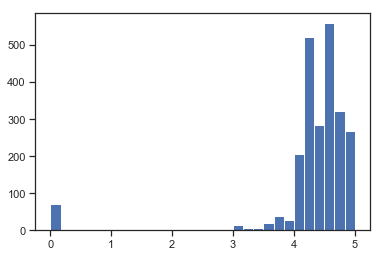

In [50]:
plt.hist(data['Rating'], 30)
plt.show()

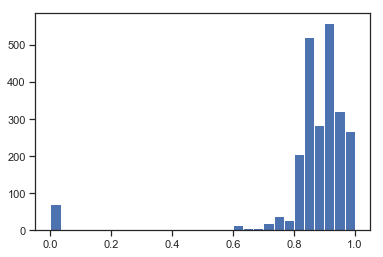

In [52]:
plt.hist(sc1_data, 30)
plt.show()

In [53]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Rating']])

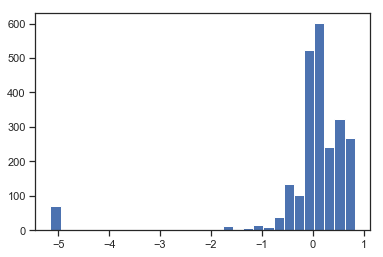

In [54]:
plt.hist(sc2_data, 30)
plt.show()

In [55]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Rating']])

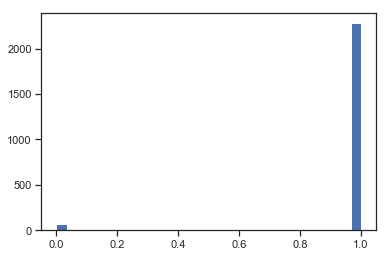

In [57]:
plt.hist(sc3_data, 30)
plt.show()